# Data Retrieving

Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

Reading the Excel Files using the Pandas library and storing it as a Dataframe

In [3]:
df1 = pd.read_excel('/content/Medibuddy_Insurance_Data_Price.xlsx')
df2 = pd.read_excel('/content/Medibuddy_insurance_data_personal_details.xlsx')

Displaying first few rows of each Dataframe.

In [ ]:
print("First CSV (insurance1.csv):")
print(df1.head())
print("\nSecond CSV (insurance2.csv):")
print(df2.head())

First CSV (insurance1.csv):
  Policy no.  age     sex     bmi  charges in INR
0  PLC156898   19  female  27.900     16884.92400
1  PLC156907   18    male  33.770      1725.55230
2  PLC156916   28    male  33.000      4449.46200
3  PLC156925   33    male  22.705     21984.47061
4  PLC156934   32    male  28.880      3866.85520

Second CSV (insurance2.csv):
  Policy no.  children smoker     region
0  PLC157006         0     no  southwest
1  PLC157033         1     no  southwest
2  PLC157060         0     no  southwest
3  PLC157087         1     no  southwest
4  PLC157186         5     no  southwest


Merge datasets on 'Policy no.'

In [4]:
df = pd.merge(df1, df2, on='Policy no.', how='inner')
print("\nMerged Dataset:")
print(df.head())


Merged Dataset:
  Policy no.  age     sex     bmi  charges in INR  children smoker     region
0  PLC156898   19  female  27.900     16884.92400         0    yes  southwest
1  PLC156907   18    male  33.770      1725.55230         1     no  southeast
2  PLC156916   28    male  33.000      4449.46200         3     no  southeast
3  PLC156925   33    male  22.705     21984.47061         0     no  northwest
4  PLC156934   32    male  28.880      3866.85520         0     no  northwest


# **Data Preprocessing**

Check for missing values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64


Handle missing values (if any)
For numerical columns (age, bmi, charges, children), impute with median
For categorical columns (sex, smoker, region), impute with mode

In [ ]:
for col in ['age', 'bmi', 'charges in INR', 'children']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in ['sex', 'smoker', 'region']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

Checking the data types of the df Dataframe

In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Policy no.         object
age                 int64
sex                object
bmi               float64
charges in INR    float64
children            int64
smoker             object
region             object
dtype: object


Convert categorical columns to category type

In [ ]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

Check for duplicates and if any duplicates are present then drop them.

In [ ]:
print("\nDuplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


# Exploratory Data Analysis

Descriptive statistics of the Data

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
       Policy no.          age   sex          bmi  charges in INR  \
count        1338  1338.000000  1338  1338.000000     1338.000000   
unique       1338          NaN     2          NaN             NaN   
top     PLC168931          NaN  male          NaN             NaN   
freq            1          NaN   676          NaN             NaN   
mean          NaN    39.207025   NaN    30.663397    13270.422265   
std           NaN    14.049960   NaN     6.098187    12110.011237   
min           NaN    18.000000   NaN    15.960000     1121.873900   
25%           NaN    27.000000   NaN    26.296250     4740.287150   
50%           NaN    39.000000   NaN    30.400000     9382.033000   
75%           NaN    51.000000   NaN    34.693750    16639.912515   
max           NaN    64.000000   NaN    53.130000    63770.428010   

           children smoker     region  
count   1338.000000   1338       1338  
unique          NaN      2          4  
top             NaN     no

Distribution of numerical variables

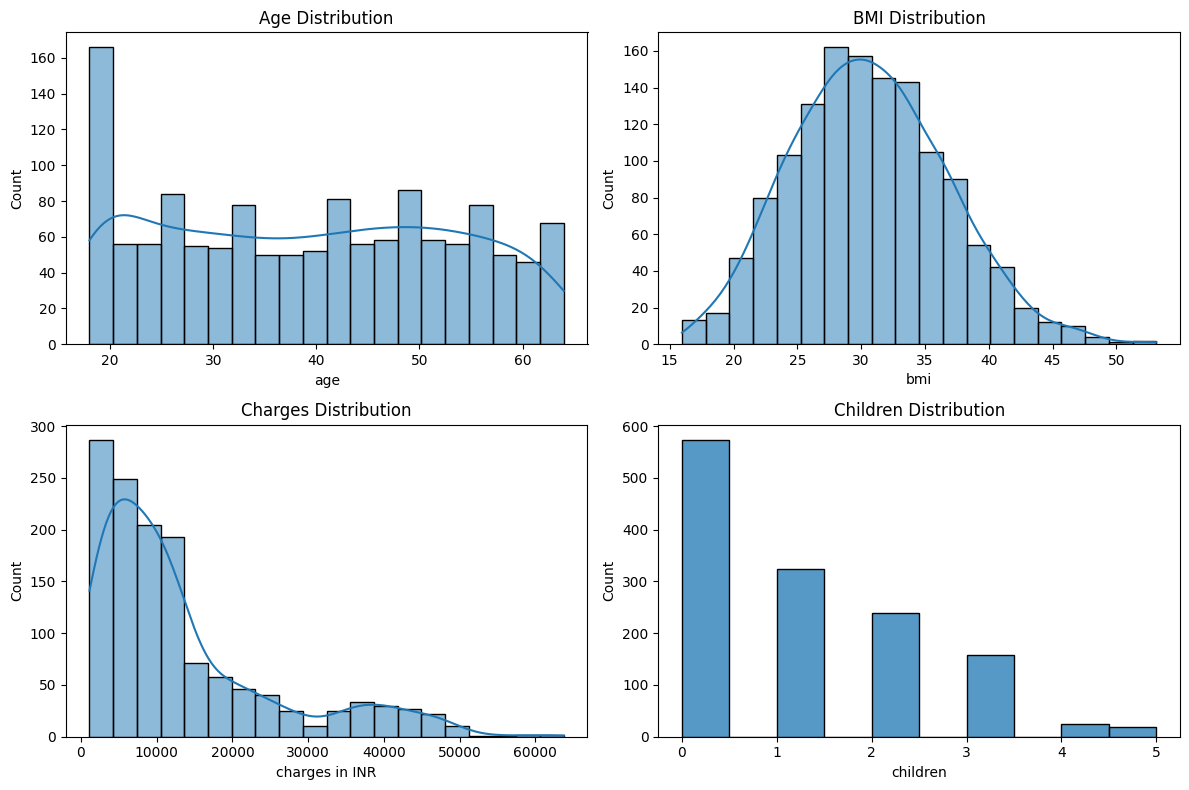

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['charges in INR'], bins=20, kde=True)
plt.title('Charges Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['children'], bins=10, kde=False)
plt.title('Children Distribution')
plt.tight_layout()
plt.show()

Distrubution of Categorical variables

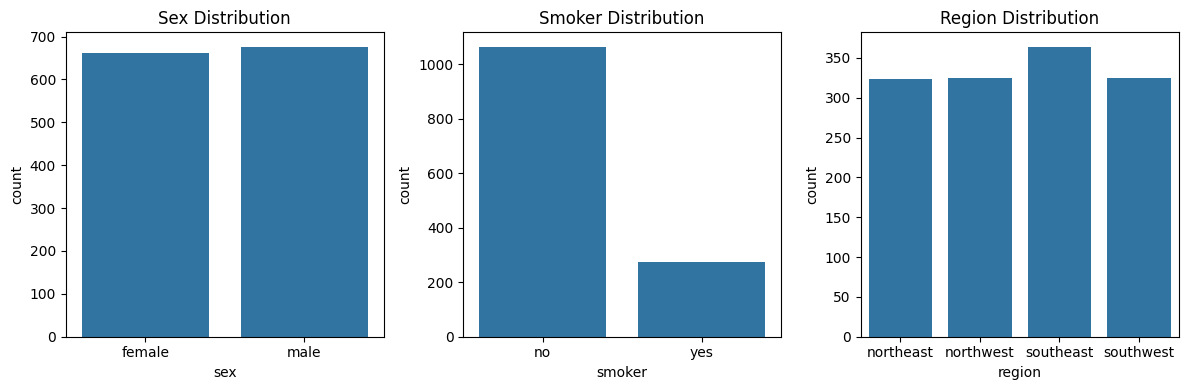

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.tight_layout()
plt.show()

Creating the Correlation matrix and visually represnting it

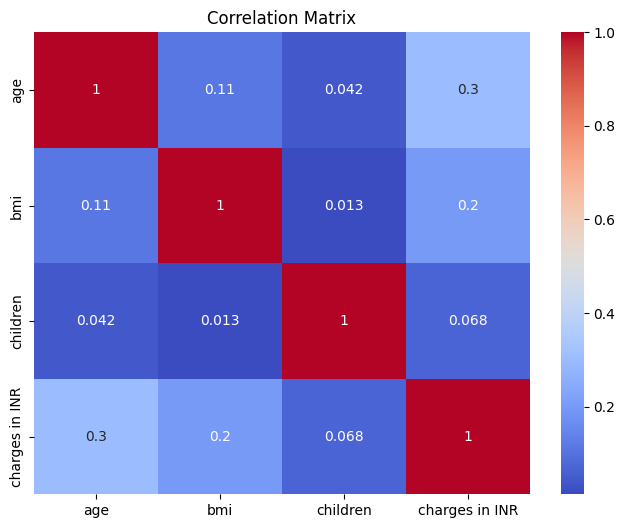

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'children', 'charges in INR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Answer the Eight Analysis Questions

In [ ]:
print("\nQuestion 1: Does the gender of the person matter for the company as a constraint for extending policies?")
avg_charges_by_sex = df.groupby('sex')['charges in INR'].mean()
print("Average Charges by Sex:")
print(avg_charges_by_sex)


Question 1: Does the gender of the person matter for the company as a constraint for extending policies?
Average Charges by Sex:
sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


T-test p-value: 0.0358


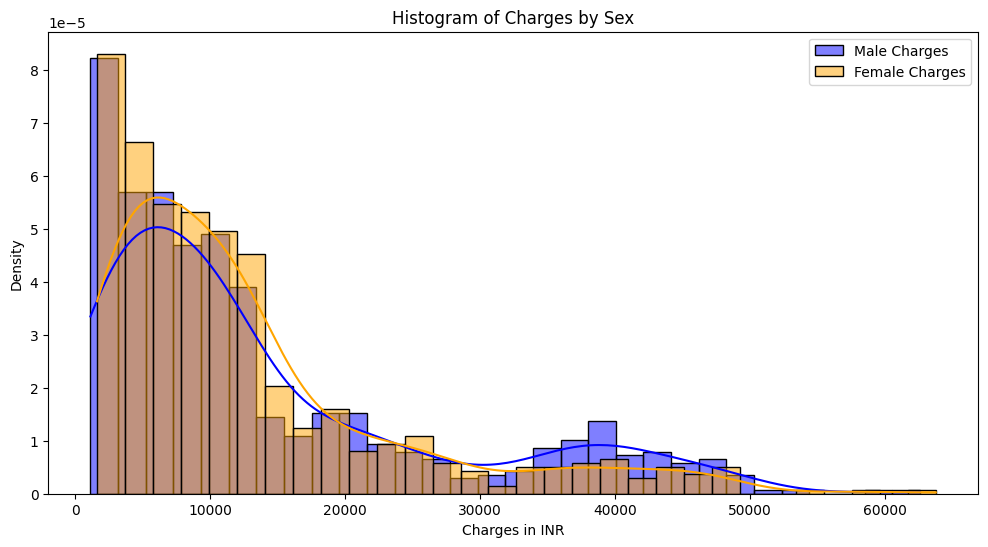

In [5]:
# T-test for significance
male_charges = df[df['sex'] == 'male']['charges in INR']
female_charges = df[df['sex'] == 'female']['charges in INR']
t_stat, p_value = ttest_ind(male_charges, female_charges, equal_var=False)
print(f"T-test p-value: {p_value:.4f}")

plt.figure(figsize=(12, 6))
sns.histplot(male_charges, bins=30, color='blue', label='Male Charges', kde=True, stat="density", alpha=0.5)
sns.histplot(female_charges, bins=30, color='orange', label='Female Charges', kde=True, stat="density", alpha=0.5)
plt.title('Histogram of Charges by Sex')
plt.xlabel('Charges in INR')
plt.ylabel('Density')
plt.legend()
plt.show()

Since the p-value = 0.0358 < 0.05, the difference in charges between males and females is statistically significant. This means gender has a measurable effect on the insurance charges.
  Yes, gender does matter as a constraint for extending policies, as there is a statistically significant difference in the average charges between males and females. Males, on average, claim more than females, which the company may consider while pricing or structuring policies.

In [ ]:
print("\nQuestion 2: What is the average amount of money the company spent over each policy cover?")
avg_charges = df['charges in INR'].mean()
print(f"Average Charges: {avg_charges:.2f} INR")


Question 2: What is the average amount of money the company spent over each policy cover?
Average Charges: 13270.42 INR



Question 3: Could you advice if the company needs to offer separate policies based upon the geographic location of the person?
Average Charges by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64


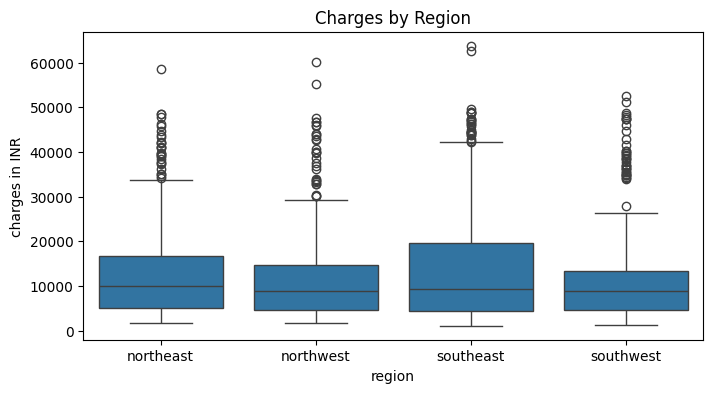

In [ ]:
print("\nQuestion 3: Could you advice if the company needs to offer separate policies based upon the geographic location of the person?")
avg_charges_by_region = df.groupby('region')['charges in INR'].mean()
print("Average Charges by Region:")
print(avg_charges_by_region)

plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='charges in INR', data=df)
plt.title('Charges by Region')
plt.show()

Yes, based on the observed differences in average charges, particularly the higher costs in the southeast region, the company should consider offering separate or regionally adjusted policies. This could help better manage risk and pricing strategies.

In [ ]:
print("\nQuestion 4: Does the no. of dependents make a difference in the amount claimed?")
avg_charges_by_children = df.groupby('children')['charges in INR'].mean()
print("Average Charges by Number of Children:")
print(avg_charges_by_children)


Question 4: Does the no. of dependents make a difference in the amount claimed?
Average Charges by Number of Children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64


In [ ]:
from scipy.stats import f_oneway
grouped_charges = [df[df['children'] == i]['charges in INR'] for i in sorted(df['children'].unique())]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_charges)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3.296920166720223
p-value: 0.00578568138087587


Yes, the number of dependents does make a statistically significant difference in the amount claimed. The company can consider this factor while designing or customizing policy covers especially for families with 2 to 3 children, where the average claim amounts are notably higher.

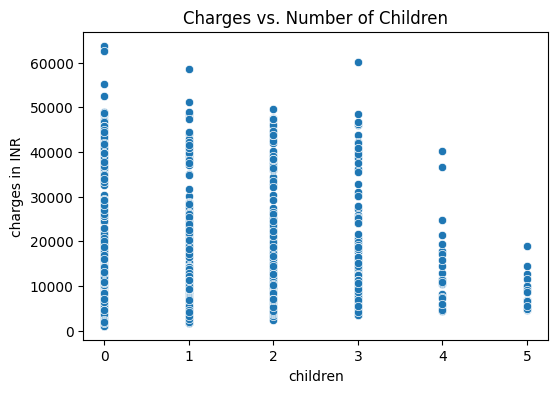

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='children', y='charges in INR', data=df)
plt.title('Charges vs. Number of Children')
plt.show()


Question 5: Does a study of persons BMI get the company any idea for the insurance claim that it would extend?
Average Charges by BMI Category:
bmi_category
Underweight     8657.620652
Normal         10404.900084
Overweight     11006.809989
Obese          15491.542238
Name: charges in INR, dtype: float64


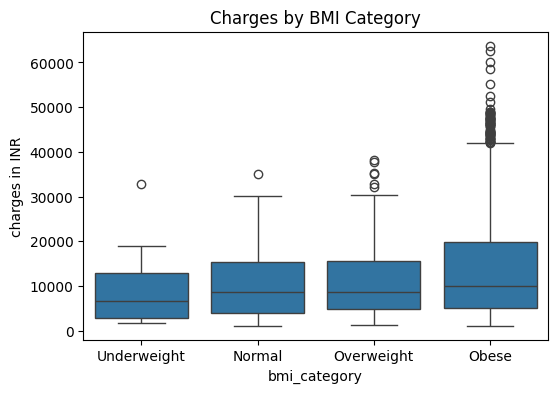

BMI-Charges Correlation: 0.1983


In [ ]:
print("\nQuestion 5: Does a study of persons BMI get the company any idea for the insurance claim that it would extend?")
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
avg_charges_by_bmi = df.groupby('bmi_category')['charges in INR'].mean()
print("Average Charges by BMI Category:")
print(avg_charges_by_bmi)

plt.figure(figsize=(6, 4))
sns.boxplot(x='bmi_category', y='charges in INR', data=df)
plt.title('Charges by BMI Category')
plt.show()

print(f"BMI-Charges Correlation: {df['bmi'].corr(df['charges in INR']):.4f}")


Yes, studying a person's BMI gives the company useful insight for estimating insurance claims. While the correlation is not very strong, the Obese group has significantly higher average charges, suggesting that BMI can be a relevant risk indicator and used in combination with other factors when extending or pricing policy covers.


Question 6: Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?
Average Charges by Smoker Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64


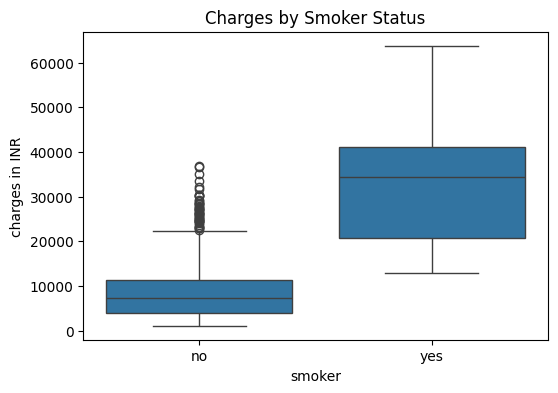

In [ ]:
print("\nQuestion 6: Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?")
avg_charges_by_smoker = df.groupby('smoker')['charges in INR'].mean()
print("Average Charges by Smoker Status:")
print(avg_charges_by_smoker)

plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges in INR', data=df)
plt.title('Charges by Smoker Status')
plt.show()

Yes, it is critical for the company to know whether a person is a smoker or non-smoker. Smoking status is a strong determinant of insurance cost and risk, and it should be mandatory information when underwriting policies or determining premiums.





Question 7: Does age have any barrier on the insurance claimed?
Average Charges by Age Category:
age_category
Young      9397.552051
Middle    13280.774031
Senior    18084.987223
Name: charges in INR, dtype: float64


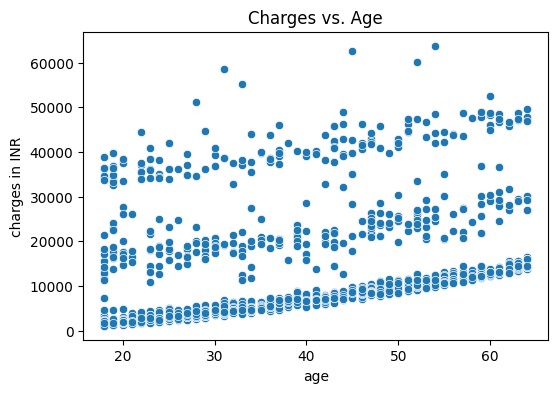

Age-Charges Correlation: 0.2990


In [ ]:
print("\nQuestion 7: Does age have any barrier on the insurance claimed?")
df['age_category'] = pd.cut(df['age'], bins=[0, 30, 50, float('inf')],
                           labels=['Young', 'Middle', 'Senior'])
avg_charges_by_age = df.groupby('age_category')['charges in INR'].mean()
print("Average Charges by Age Category:")
print(avg_charges_by_age)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='charges in INR', data=df)
plt.title('Charges vs. Age')
plt.show()

print(f"Age-Charges Correlation: {df['age'].corr(df['charges in INR']):.4f}")

Yes, age is a significant factor in the amount of insurance claimed. Older individuals (especially seniors) tend to claim considerably higher amounts, which means age should be considered as a barrier or pricing factor in insurance policy structuring and risk evaluation.

In [ ]:
print("\nQuestion 8: Can the company extend certain discounts after checking the health status(BMI) in this case?")
print("From Question 5, normal BMI (18.5–24.9) has lower charges.")
print("Discount feasibility depends on charge differences and company policy.")


Question 8: Can the company extend certain discounts after checking the health status(BMI) in this case?
From Question 5, normal BMI (18.5–24.9) has lower charges.
Discount feasibility depends on charge differences and company policy.


Yes, the company can offer discounts based on BMI categories to promote healthier lifestyles and reduce long-term insurance risk.

In [ ]:
df.to_csv('processed_insurance_data.csv', index=False)
print("\nProcessed data saved as 'processed_insurance_data.csv'")


Processed data saved as 'processed_insurance_data.csv'


# Building the Machine Learning Model

In [ ]:
features = [col for col in ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] if col in df]
target = 'charges in INR'
X = df[features]
y = df[target]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features = [col for col in ['age', 'bmi', 'children'] if col in features]
categorical_features = [col for col in ['sex', 'smoker', 'region'] if col in features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
       Policy no.          age   sex          bmi  charges in INR  \
count        1338  1338.000000  1338  1338.000000     1338.000000   
unique       1338          NaN     2          NaN             NaN   
top     PLC168931          NaN  male          NaN             NaN   
freq            1          NaN   676          NaN             NaN   
mean          NaN    39.207025   NaN    30.663397    13270.422265   
std           NaN    14.049960   NaN     6.098187    12110.011237   
min           NaN    18.000000   NaN    15.960000     1121.873900   
25%           NaN    27.000000   NaN    26.296250     4740.287150   
50%           NaN    39.000000   NaN    30.400000     9382.033000   
75%           NaN    51.000000   NaN    34.693750    16639.912515   
max           NaN    64.000000   NaN    53.130000    63770.428010   

           children smoker     region bmi_category age_category  
count   1338.000000   1338       1338         1338         1338  
unique        

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }

In [ ]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', RandomForestRegressor(random_state=42))])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2', n_jobs=1)
grid_search.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Random Forest Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best R2 Score: 0.8406672623035739


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTuned Random Forest Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} INR")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} INR")
print(f"R2: {r2_score(y_test, y_pred):.4f}")


Tuned Random Forest Performance:
RMSE: 4360.15 INR
MAE: 2478.83 INR
R2: 0.8775


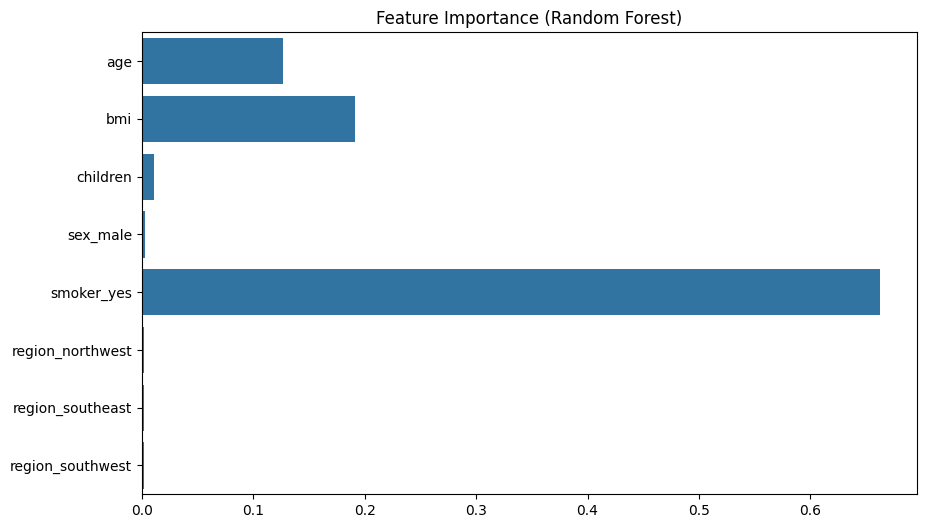

In [ ]:
if 'Random Forest' in models:
    feature_importance = best_model.named_steps['model'].feature_importances_
    feature_names = (numerical_features +
                     list(best_model.named_steps['preprocessor']
                          .named_transformers_['cat']
                          .get_feature_names_out(categorical_features)))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance (Random Forest)')
    plt.show()